A2.1_588359

DIEGO MARCELO GONZALEZ LUJAN IMT 588359

La base de datos fue obtenida de la página oficial del INEGI, y se llama Encuesta Mensual de la Industria Manufacturera (EMIM) Serie 2018. Su objetivo es generar estadísticas sobre el comportamiento económico de las principales variables del sector manufacturero en México, sirviendo como insumo para cálculos macroeconómicos y diversos indicadores relacionados con la producción, el empleo y la productividad de la industria manufacturera. Esta encuesta se basa en estándares internacionales y normativas nacionales, y se enfoca en el sector 31-33, correspondiente a las Industrias manufactureras según el Sistema de Clasificación Industrial de América del Norte (SCIAN) 2018.

La unidad de observación es el establecimiento manufacturero, el cual se define como la unidad económica que realiza actividades de ensamble, procesamiento y transformación de materias primas. La información recolectada incluye variables como días trabajados, personal ocupado, horas trabajadas, remuneraciones, capacidad de planta utilizada, gastos, ingresos, producción y ventas. La cobertura es nacional, con periodicidad mensual.

El diseño estadístico se basa en el Registro Estadístico de Negocios de México (RENEM) como marco de muestreo, utilizando un esquema probabilístico y estratificado con un nivel de confianza del 95%. La encuesta cubre 25 clases de actividad económica de manera probabilística y 181 clases no probabilísticas, con una tasa de no respuesta del 10%. Las variables clave para el análisis son los ingresos por suministro de bienes y servicios y el personal ocupado.

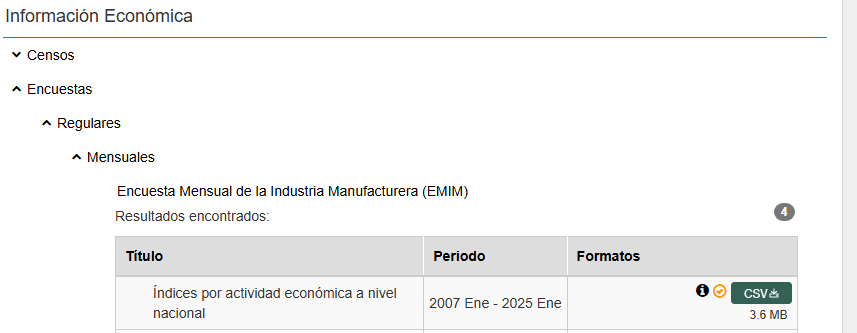

1. Importa los datos a tu ambiente de trabajo y separa los datos en entrenamiento y prueba, con una relación que consideres adecuada, manteniendo un balance de clases. Demuestra que se cumplió la condición imprimiendo datos relevantes en la consola.

En este codigo primero importe la nueva base de datos que estoy usando y se eliminan las filas con valores nulos en las columnas relevantes. Luego separe las caracteristicas y la variable objetivo para dividirlos en un conjunto de entrenamiento y prueba utilizando la funcion train_test_split manteniendo la proporcion original de las clases mediante el parametro stratify. Luego realize un balance de clases tanto enel conjunto de entrenamiento como en el de prueba, submuestreando la clase mayoritatia para que ambas clases tengan la misma cantidad de instancias. Finalmente se imprime la distribucion original y balanceada de las clases. El resultado muestra que antes de balanceo las clases estaban desbalanceadas pero despues de la operacion ambas clases tienen la misma proporcion en ambos conjuntos. 

In [1]:
import pandas as pd

df = pd.read_csv('bitacora_de_cambios_tr_indice_cla_mensual_nac_2007_2023.csv')

# Mostrar las primeras filas para revisar su estructura
df.head()

,Número de registro o fila,Nombre de campo,Dato publicado,Dato nuevo,Estatus del cambio,Fecha de modificación,Unnamed: 6
0,8,IVFP_C,0.0,163.3,Cifras preliminares,14/08/2023,Se modificó el proceso de retropolación del pe...
1,214,IVFP_C,0.0,172.5,Cifras preliminares,14/08/2023,Se modificó el proceso de retropolación del pe...
2,420,IVFP_C,0.0,215.6,Cifras preliminares,14/08/2023,Se modificó el proceso de retropolación del pe...
3,626,IVFP_C,0.0,204.0,Cifras preliminares,14/08/2023,Se modificó el proceso de retropolación del pe...
4,832,IVFP_C,0.0,153.0,Cifras preliminares,14/08/2023,Se modificó el proceso de retropolación del pe...


In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Elimino filas con valores nulos 
df = df.dropna(subset=["Número de registro o fila", "Unnamed: 6", "Fecha de modificación"])

# Separo características X y variable objetivo y
X = df.drop(columns=["Estatus del cambio"])
y = df["Nombre de campo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Submuestro la clase mayoritaria en el conjunto de entrenamiento
class_count = y_train.value_counts()
min_class_size = class_count.min()

# Crear un conjunto de entrenamiento balanceado
X_train_balanced = pd.concat([X_train[y_train == label].sample(min_class_size, random_state=42) for label in class_count.index])
y_train_balanced = pd.concat([y_train[y_train == label].sample(min_class_size, random_state=42) for label in class_count.index])

# Submuestro la clase mayoritaria en el conjunto de prueba
class_count_test = y_test.value_counts()
min_class_size_test = class_count_test.min()

# Crear un conjunto de prueba balanceado
X_test_balanced = pd.concat([X_test[y_test == label].sample(min_class_size_test, random_state=42) for label in class_count_test.index])
y_test_balanced = pd.concat([y_test[y_test == label].sample(min_class_size_test, random_state=42) for label in class_count_test.index])

# Verificar la nueva distribución en el conjunto de entrenamiento balanceado
train_distribution_balanced = y_train_balanced.value_counts(normalize=True)
test_distribution_balanced = y_test_balanced.value_counts(normalize=True)

print("Distribución original de clases en entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución balanceada de clases en entrenamiento:")
print(train_distribution_balanced)

print("\nDistribución original de clases en prueba:")
print(y_test.value_counts(normalize=True))

print("\nDistribución balanceada de clases en prueba:")
print(test_distribution_balanced)

Distribución original de clases en entrenamiento:
Nombre de campo
IVFP_C      0.825784
IRT_CUTR    0.174216
Name: proportion, dtype: float64

Distribución balanceada de clases en entrenamiento:
Nombre de campo
IVFP_C      0.5
IRT_CUTR    0.5
Name: proportion, dtype: float64

Distribución original de clases en prueba:
Nombre de campo
IVFP_C      0.833333
IRT_CUTR    0.166667
Name: proportion, dtype: float64

Distribución balanceada de clases en prueba:
Nombre de campo
IVFP_C      0.5
IRT_CUTR    0.5
Name: proportion, dtype: float64


2. Corre una regresión logística simple con la función GLM de statsmodels con todas tus variables de entrada e imprime el resumen del modelo en consola. Indica cuáles son las 2 variables más relevantes para este estudio y selecciónalas, eliminando todas las demás variables de tus datos de entrenamiento y prueba. (use chatgpt para que me ayudara en arreglar la nueva base de datos que estoy usando, errores de NaNs.)


En este codigo lo primero que hice fue importar los datos y realizar un preprocesamiento, como convertir la columna fecha de modificaciuon a un formato de fecha y eliminar las filas con valores nulos en las columnas relevantes. Luego realice una regresion logisitca usando el modelo GLM de statsmodels, donde seleccione las variables numericas.Finalmente imprimi los resultados en un resumel del modelo y por los resultados la variuable numero de registro o fila fue la mas significativa. El conjunto de datos de entrenamiento se redujo a estas variable sseleccionda y los resultaods mostraron que Numeor de registro o fila era la variable mas importante



In [4]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Convertir la columna "Fecha de modificación" a formato fecha (si es necesario)
df["Fecha de modificación"] = pd.to_datetime(df["Fecha de modificación"], errors='coerce', dayfirst=True)

# Elimino filas con valores nulos en las columnas relevantes, excepto "Fecha de modificación"
df = df.dropna(subset=["Número de registro o fila", "Unnamed: 6"])

# Separo características X y variable objetivo y
X = df.drop(columns=["Estatus del cambio", "Nombre de campo"])  
y = df["Nombre de campo"]

# Balanceo de las clases en el conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

class_count = y_train.value_counts()
min_class_size = class_count.min()

X_train_balanced = pd.concat([X_train[y_train == label].sample(min_class_size, random_state=42) for label in class_count.index])
y_train_balanced = pd.concat([y_train[y_train == label].sample(min_class_size, random_state=42) for label in class_count.index])

class_count_test = y_test.value_counts()
min_class_size_test = class_count_test.min()

X_test_balanced = pd.concat([X_test[y_test == label].sample(min_class_size_test, random_state=42) for label in class_count_test.index])
y_test_balanced = pd.concat([y_test[y_test == label].sample(min_class_size_test, random_state=42) for label in class_count_test.index])

# Elimino las columnas de tipo fecha para no pasarlas al escalador
X_train_numeric = X_train_balanced.select_dtypes(include=[float, int])
X_test_numeric = X_test_balanced.select_dtypes(include=[float, int])

# Escalado de las variables numéricas (si es necesario para la regresión logística)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_train_numeric.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_numeric), columns=X_test_numeric.columns)

# Codificación de la variable objetivo (Label Encoding)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_balanced)
y_test_encoded = encoder.transform(y_test_balanced)

# Añadir una constante (intercepto) al conjunto de entrenamiento y prueba para el GLM
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Ajustar el modelo GLM (Regresión Logística)
model = sm.GLM(y_train_encoded, X_train_scaled, family=sm.families.Binomial())
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Identificar las 2 variables más relevantes (por ejemplo, aquellas con los coeficientes más altos)
relevant_variables = results.pvalues[results.pvalues < 0.05].index[:2]  # Tomamos las dos variables más significativas
print("\nLas 2 variables más relevantes son:", relevant_variables)

# Eliminar todas las demás variables de entrenamiento y prueba, dejando solo las 2 más relevantes
X_train_reduced = X_train_scaled[relevant_variables]
X_test_reduced = X_test_scaled[relevant_variables]

# Verificamos las nuevas características seleccionadas
print("\nConjunto de entrenamiento con las 2 variables seleccionadas:")
print(X_train_reduced.head())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 19 Mar 2025   Deviance:                       31.439
Time:                        18:46:45   Pearson chi2:                     638.
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

3. Genera un modelo usando la metodología de linear discriminant analysis. Visualiza la función discriminante con una gráfica de variable 1 vs variable 2, donde cada observación tenga algo que la distinga dependiendo de su clase (por ejemplo, distinto color, distinto marcador, etc.)

En este codigo realize un preprocesamiento de los datos convirtiendo la columna fecha de modificacion en un formato de fecha eliminando las filas con valores nulos en las columnas relevantes. Use la Linear Discriminant Analysis para entrenar un modelo que se ajusta a los datos de entrenamiento balanceado. Finalmente seleccione las primeros dos variables mas relevantes para visualizar y use matplotlib para graficar la funcion discriminante en un grafico 2D, donde las observaciones estan diferenciadas por color segun su clase. 


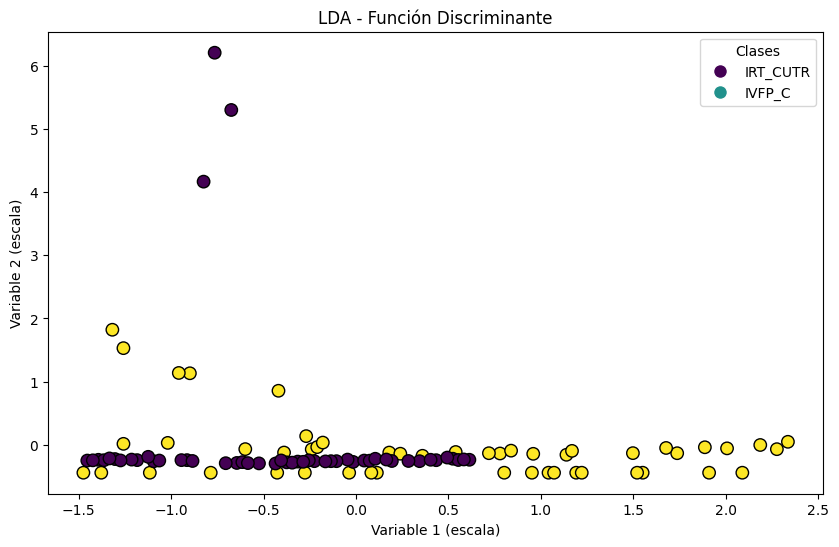

In [27]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df["Fecha de modificación"] = pd.to_datetime(df["Fecha de modificación"], errors='coerce', dayfirst=True)

df = df.dropna(subset=["Número de registro o fila", "Unnamed: 6"])

X = df.drop(columns=["Estatus del cambio", "Nombre de campo"])  
y = df["Nombre de campo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

class_count = y_train.value_counts()
min_class_size = class_count.min()

X_train_balanced = pd.concat([X_train[y_train == label].sample(min_class_size, random_state=42) for label in class_count.index])
y_train_balanced = pd.concat([y_train[y_train == label].sample(min_class_size, random_state=42) for label in class_count.index])

# Escalado de las variables numéricas
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_balanced.select_dtypes(include=[float, int])), columns=X_train_balanced.select_dtypes(include=[float, int]).columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test.select_dtypes(include=[float, int])), columns=X_test.select_dtypes(include=[float, int]).columns)

# Codificación de la variable objetivo (Label Encoding)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_balanced)
y_test_encoded = encoder.transform(y_test)

# Entrenar el modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train_encoded)

# Obtener los coeficientes de la función discriminante
lda_coef = lda.coef_

# Visualización de la función discriminante en un gráfico 2D de las 2 primeras variables más relevantes
# Seleccionamos las dos primeras variables más relevantes
X_train_reduced = X_train_scaled.iloc[:, :2]
y_train_reduced = y_train_encoded

# Graficamos los puntos y los colores según las clases
plt.figure(figsize=(10, 6))

# Mapa de colores para las clases
scatter = plt.scatter(X_train_reduced.iloc[:, 0], X_train_reduced.iloc[:, 1], c=y_train_reduced, cmap='viridis', edgecolors='k', s=80)

# Añadir etiquetas a la gráfica
plt.xlabel('Variable 1 (escala)')
plt.ylabel('Variable 2 (escala)')
plt.title('LDA - Función Discriminante')

# Crear la leyenda manualmente usando la codificación de clases
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=plt.cm.viridis(i / len(encoder.classes_))) for i, label in enumerate(encoder.classes_)]
plt.legend(handles=handles, title='Clases')

plt.show()


4. Genera un modelo usando la metodología de árboles de decisión. Deberás podar el árbol, habiendo seleccionado primero un valor óptimo de 𝛼𝛼 mediante una metodología de LOOCV. Visualiza tanto el árbol resultante, como la partición en una gráfica de variable 1 vs variable 2, donde cada observación tenga algo que la distinga dependiendo de su clase.

En este codigo implemente un modelo de arbol de decision y aplica poda meidante el parametro ccp_alpha, que controla la complejidad del arbol. Primero proporciene los datos, convirtiendo la columna "fecha de modificacion" a tipo fecha y eliminando las filas con valores nulos en las columnas relevantes, despues los datos se dividen en conjuntos de entrenamiento y prueba. Para seleccionar el valor optimo se utilice validacion cruzada y el valor que maximiza la puntuacion promedio se emplea para entrenar al arbol de decision. 

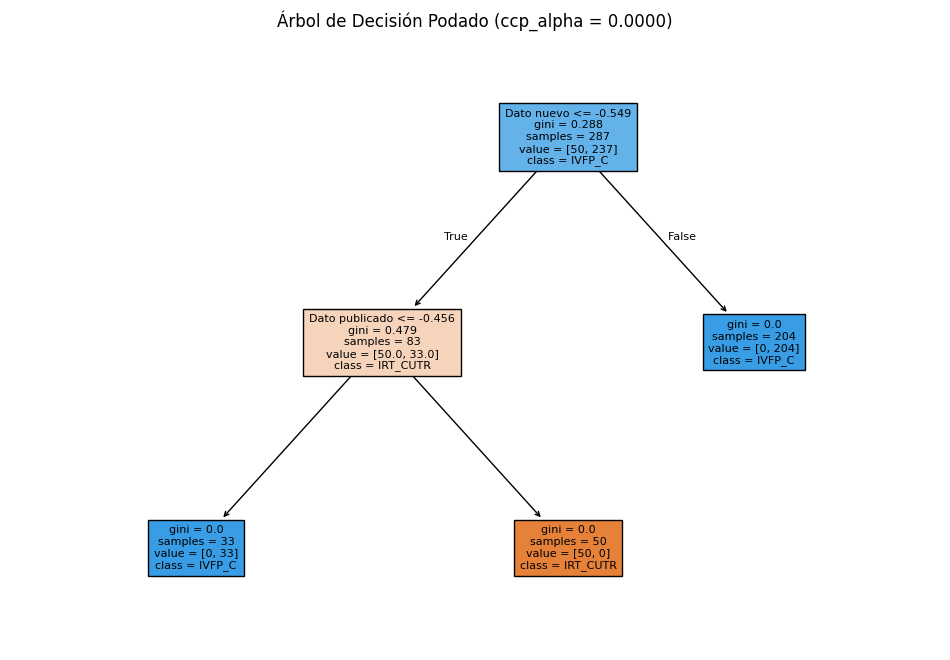

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


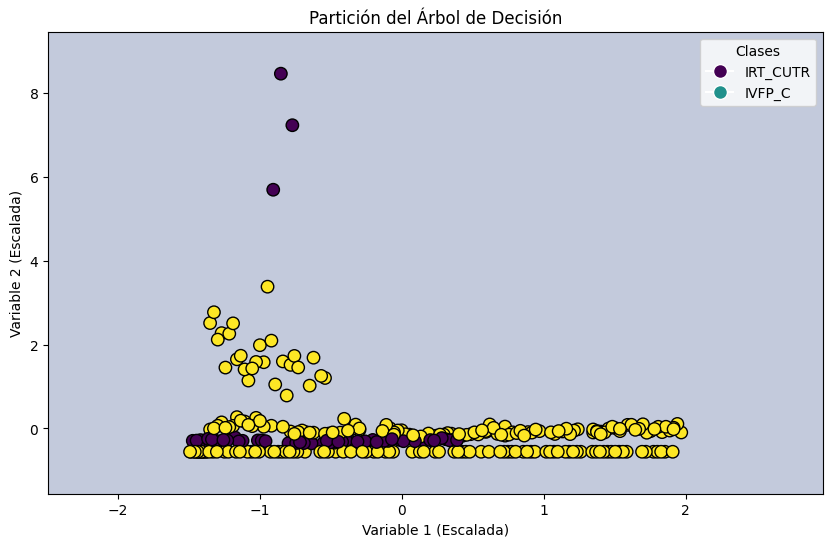

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('bitacora_de_cambios_tr_indice_cla_mensual_nac_2007_2023.csv', encoding="utf-8")

# Convertir "Fecha de modificación" a tipo fecha
df["Fecha de modificación"] = pd.to_datetime(df["Fecha de modificación"], errors='coerce', dayfirst=True)

df = df.dropna(subset=["Número de registro o fila", "Unnamed: 6"])

X = df.drop(columns=["Estatus del cambio", "Nombre de campo"])  
y = df["Nombre de campo"]

# Codificación de la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.select_dtypes(include=[np.number])), columns=X.select_dtypes(include=[np.number]).columns)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Obtener valores óptimos de `ccp_alpha` usando validación cruzada
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Omitimos el último ya que poda todo el árbol

# Evaluar cada valor de `ccp_alpha` usando validación cruzada
scores = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
    scores.append(score)

# Seleccionar el mejor `ccp_alpha`
best_alpha = ccp_alphas[np.argmax(scores)]

# Entrenar el árbol con el mejor `ccp_alpha`
tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
tree.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=encoder.classes_, fontsize=8)
plt.title(f"Árbol de Decisión Podado (ccp_alpha = {best_alpha:.4f})")
plt.show()

# Visualizar la partición en un gráfico de variable 1 vs variable 2
# Elegimos las dos primeras variables principales
X_reduced = X_train.iloc[:, :2]

# Crear una malla de puntos para graficar la frontera de decisión
x_min, x_max = X_reduced.iloc[:, 0].min() - 1, X_reduced.iloc[:, 0].max() + 1
y_min, y_max = X_reduced.iloc[:, 1].min() - 1, X_reduced.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predecir la clase para cada punto de la malla
third_feature = np.full_like(xx.ravel(), fill_value=X_train.iloc[:, 2].mean())
Z = tree.predict(np.c_[xx.ravel(), yy.ravel(), third_feature])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_reduced.iloc[:, 0], X_reduced.iloc[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=80)

# Etiquetas y título
plt.xlabel('Variable 1 (Escalada)')
plt.ylabel('Variable 2 (Escalada)')
plt.title('Partición del Árbol de Decisión')

# Crear una leyenda con las clases
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=plt.cm.viridis(i / len(encoder.classes_))) for i, label in enumerate(encoder.classes_)]
plt.legend(handles=handles, title='Clases')

# Mostrar la gráfica
plt.show()



5. Calcula, para ambos modelos, todas las métricas revisadas en clase en los datos de prueba. Indica qué opinas sobre los resultados, especificando si crees que uno de los dos
modelos es mejor para esta tarea específica.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import pandas as pd

# Separar variables predictoras y objetivo
X = df.drop(columns=["Unnamed: 6"])  # Eliminar columnas irrelevantes si es necesario
y = df["Nombre de campo"]  # Asegúrate de que esta columna sea la de clases

# Convertir fechas a valores numéricos
if "Fecha de modificación" in X.columns:
    X["Fecha de modificación"] = pd.to_datetime(X["Fecha de modificación"], format="%d/%m/%Y")  # Convertir a fecha
    X["Fecha de modificación"] = X["Fecha de modificación"].astype("int64") // 10**9  # Convertir a segundos desde epoch

# Convertir columnas categóricas a valores numéricos
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred_lda = lda.predict(X_test_scaled)

# Entrenar modelo de Árbol de Decisión
best_alpha = 0.01  # Ajustar según validación previa
tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Calcular métricas para LDA
print("Métricas para el modelo LDA:")
print("Precisión:", accuracy_score(y_test, y_pred_lda))
print("Precisión (Precision):", precision_score(y_test, y_pred_lda, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lda, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_lda, average='weighted'))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_lda))

# Calcular métricas para el modelo Árbol de Decisión
print("\nMétricas para el modelo Árbol de Decisión:")
print("Precisión:", accuracy_score(y_test, y_pred_tree))
print("Precisión (Precision):", precision_score(y_test, y_pred_tree, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tree, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_tree, average='weighted'))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_tree))

# Calcular y mostrar la curva ROC y AUC
y_prob_lda = lda.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para AUC
y_prob_tree = tree.predict_proba(X_test)[:, 1]  # Probabilidades para AUC

# ROC para LDA
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda, pos_label=tree.classes_[1])
roc_auc_lda = roc_auc_score(y_test, y_prob_lda)

# ROC para Árbol de Decisión
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree, pos_label=tree.classes_[1])
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)

# Mostrar resultados de la curva ROC y AUC
print(f"AUC para LDA: {roc_auc_lda}")
print(f"AUC para Árbol de Decisión: {roc_auc_tree}")


Métricas para el modelo LDA:
Precisión: 1.0
Precisión (Precision): 1.0
Recall: 1.0
F1-Score: 1.0
Matriz de confusión:
 [[15  0]
 [ 0 57]]

Métricas para el modelo Árbol de Decisión:
Precisión: 1.0
Precisión (Precision): 1.0
Recall: 1.0
F1-Score: 1.0
Matriz de confusión:
 [[15  0]
 [ 0 57]]
AUC para LDA: 1.0
AUC para Árbol de Decisión: 1.0


En este codigo entrene dos modelos, LDA y Arbol de Decision para predecir la clase Nombre de campo de conjunto de datos. Se realizaron tranformaciones como la conversion de fechas a valores numericos y la codificacion de variables catergoricas. Ademas, se estandarizaron las caracteristicas antes de entrenar ambos modelos. Las metricas evaluadas incluyeron precision, precision ponderada, recall, f1 scroe matriz de confusion y area bajo la curva. Los resultados mostraron que ambos modelos obtuvieron un rendimiento perfecto con valores de 1.0 en todas las metricas. Esto significa que ambos modelos han clasificado correctamente todas las observaciones.

